In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [2]:
N = 5
D = 48
T = 480 * 2
num_of_header = 5
num_of_col = 2      # 2 or 3 (channel of goniometer)
path = "C:/Users/katagi/Desktop/Workspace/Research/MultipleLinearRegression/TestData/hirato_plantar1"

def read_csv():
    Xs = list()
    
    Thetas = list()
    
    for n in range(N):
        with open(path + "/s" + str(n+1) + ".csv") as f:
            reader = csv.reader(f)
            X = list()
            for t, row in enumerate(reader):
                if t % 2 == 0:
                    x = np.append(np.array(row[:48]).astype(float), 1)
                    X.append(x)
            X = np.array(X)
            Xs.append(X)
            
        with open(path + "/g" + str(n+1) + ".csv") as f:
            reader = csv.reader(f)
            Theta = list()
            for t, row in enumerate(reader):
                if t > num_of_header:
                    Theta.append(row[num_of_col])
            Thetas.append(Theta)
    
    Xs = np.array(Xs)
    Thetas = np.array(Thetas).astype(float)[:, :, np.newaxis]
    return Xs, Thetas

In [3]:
def visualize(y, y_pred):
    x = np.arange(y.shape[0])
    y = y.reshape(-1)
    y_pred = y_pred.reshape(-1)
    
    # plt.title('Wrist angle')
    plt.xlabel('Time [ms]')
    plt.ylabel('angle')
    plt.plot(x,y_pred,color='blue',linewidth=2,label='Estimated angle')
    plt.plot(x, y ,color='red',linewidth=1,label='Measured angle', )
    # plt.ylim(-60,30)    #dorsi
    plt.ylim(-20,40)    #plantar
    plt.xlim(0, y.shape[0])
    plt.legend(loc='upper left',fontsize=10)
    plt.grid(True)
    
    plt.figure(figsize=(4,4))
    plt.title('scatter plot')
    plt.scatter(y ,y_pred)
    
    plt.show()

In [4]:
def Analysis(X, theta):
    W = list()
    X = np.transpose(X, (1, 0, 2)) #(480, 4, 49)
    theta = np.transpose(theta, (1, 0, 2)) #(480, 4, 1)
    print(X.shape, theta.shape)
    for X_t, theta_t in zip(X, theta):
        X_T_t = X_t.T
        X_T_X_inv = np.linalg.pinv(np.dot(X_T_t, X_t))
        W_t = np.dot(np.dot(X_T_X_inv, X_T_t), theta_t)
        W.append(W_t)
    W = np.array(W)
#     W = np.transpose(W, (1, 0, 2)) #(49, 480, 1)
    W = np.reshape(W, (480, 49))
    return W

In [5]:
def Calculate_R2andRMSE(Theta, Theta_pred, T):
    Theta = Theta.reshape(-1)
    
    def _R2(Theta, Theta_pred):
        corrcoef = np.corrcoef(Theta, Theta_pred)
        corrcoef = corrcoef[0][1]
        return corrcoef
        
        
    def _RMSE(Theta, Theta_pred, T):
        L = np.sum((Theta - Theta_pred)**2)
        RMSE = np.sqrt(L/T)
        return RMSE
    
    print(Theta.shape, Theta_pred.shape)
    
    print("相関係数： " + str(_R2(Theta, Theta_pred)))
    print("RMSE = " + str(_RMSE(Theta, Theta_pred, T)))

In [6]:
def main():
    Xs, Thetas = read_csv()
    for i in range(5):
#         X_train, Theta_train = Xs[:4], Thetas[:4] #(4, 480, 49), (4, 480, 1)
#         X_test, Theta_test = Xs[-1], Thetas[-1] #(1, 480, 49), (1, 480, 1)

#         W = Analysis(X_train, Theta_train) #W >> (49, 480, 1)

#         for X, Theta in zip(Xs, Thetas): #Theta_pred >> (1, 480, 1) = W() * X(480)
#             Theta_pred = list()
#             for X_t, W_t in zip(X, W):
#                 Theta_pred.append(np.dot(W_t, X_t))
#             Theta_pred = np.array(Theta_pred)
#             print(Theta_pred.shape)
#             visualize(Theta, Theta_pred)
        if i == 0:
            X_train, Theta_train = Xs[1:], Thetas[1:]
        elif i == 4:
            X_train, Theta_train = Xs[:-1], Thetas[:-1]
        else:
            X_train, Theta_train = np.concatenate([Xs[:i], Xs[i+1:]]), np.concatenate([Thetas[:i] , Thetas[i+1:]])
            print(X_train.shape, Theta_train.shape)
        X_test, Theta_test = Xs[i], Thetas[i]
        W = Analysis(X_train, Theta_train) #W >> (49, 480, 1)
        Theta_pred = list()
        for X_t, W_t in zip(X_test, W):
            Theta_pred.append(np.dot(W_t, X_t))
        Theta_pred = np.array(Theta_pred)
        visualize(Theta_test, Theta_pred)
        Calculate_R2andRMSE(Theta_test, Theta_pred, 480)

#         for X, Theta in zip(Xs, Thetas): #Theta_pred >> (1, 480, 1) = W() * X(480)
#             Theta_pred = list()
#             for X_t, W_t in zip(X, W):
#                 Theta_pred.append(np.dot(W_t, X_t))
#             Theta_pred = np.array(Theta_pred)
#             print(Theta_pred.shape)
#             visualize(Theta, Theta_pred)

(480, 4, 49) (480, 4, 1)


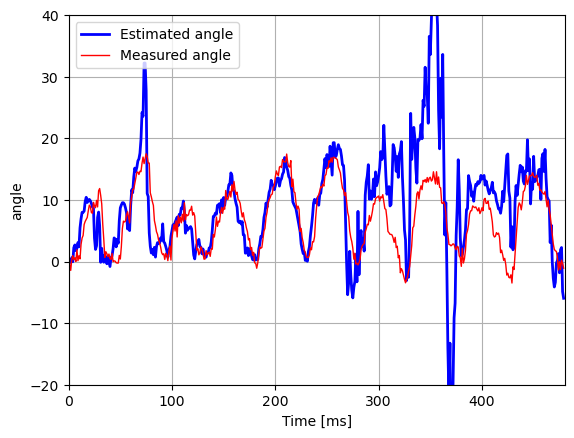

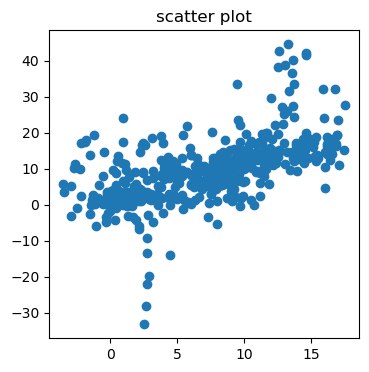

(480,) (480,)
相関係数： 0.6044662430148978
RMSE = 7.390028606193381
(4, 480, 49) (4, 480, 1)
(480, 4, 49) (480, 4, 1)


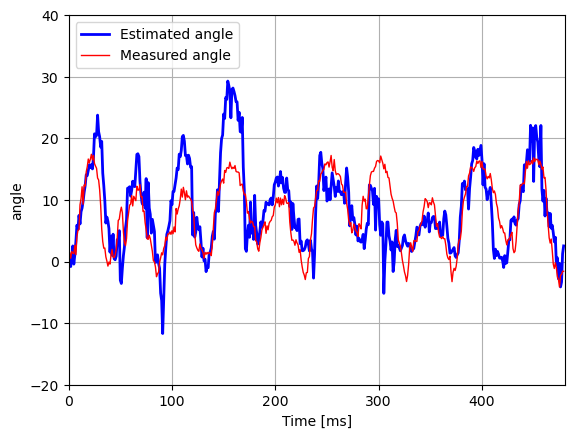

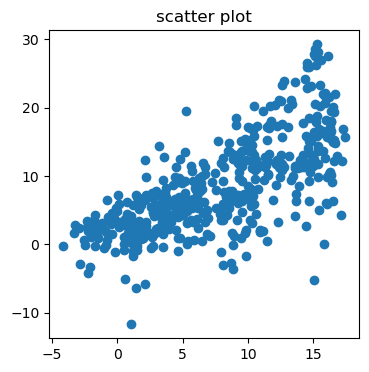

(480,) (480,)
相関係数： 0.7046810321444422
RMSE = 4.953384137540276
(4, 480, 49) (4, 480, 1)
(480, 4, 49) (480, 4, 1)


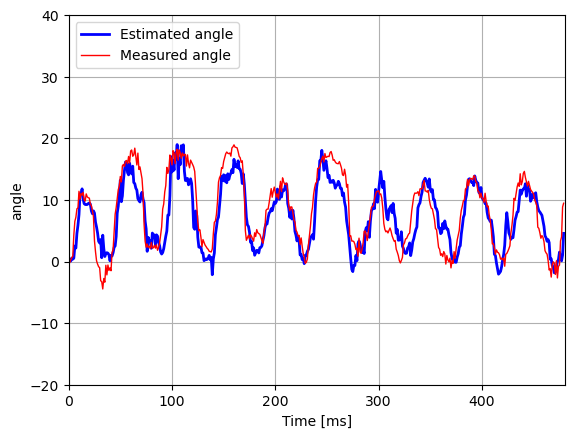

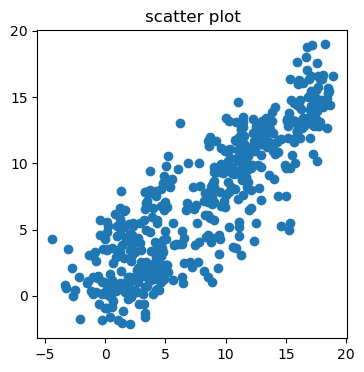

(480,) (480,)
相関係数： 0.86221610370024
RMSE = 3.1253454576669837
(4, 480, 49) (4, 480, 1)
(480, 4, 49) (480, 4, 1)


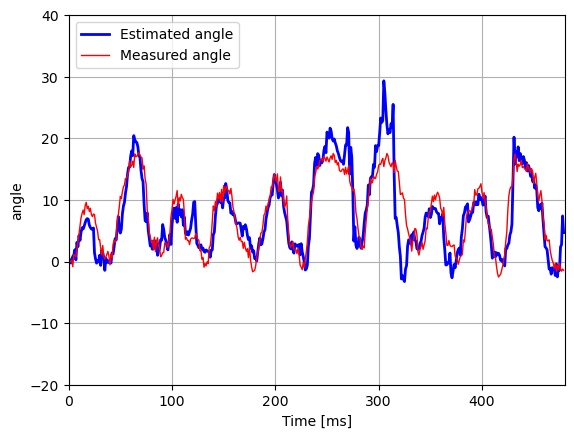

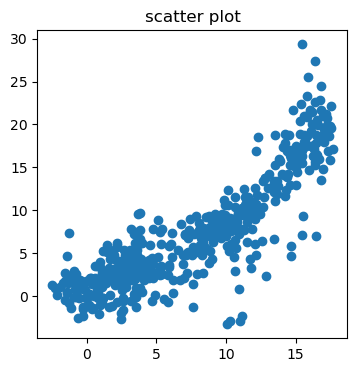

(480,) (480,)
相関係数： 0.8629430356468901
RMSE = 3.284747507631831
(480, 4, 49) (480, 4, 1)


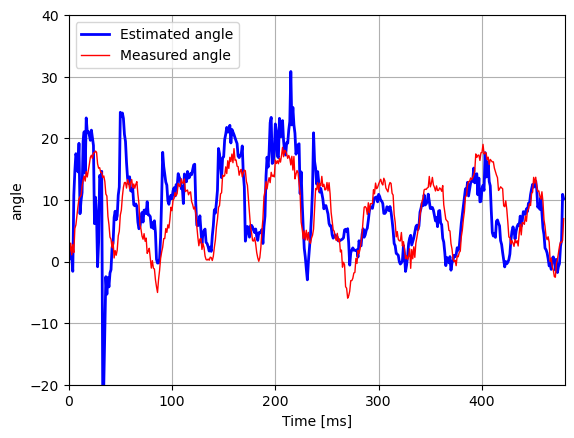

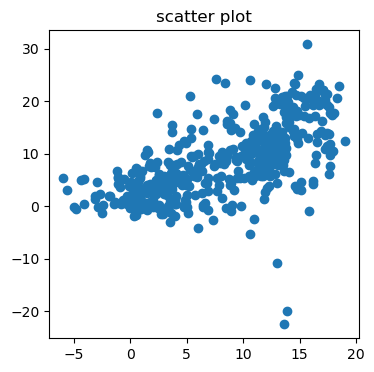

(480,) (480,)
相関係数： 0.6263056724998195
RMSE = 5.566432542940958


In [7]:
main()